<a href="https://colab.research.google.com/github/AlexandreXavierMartins/ProblemaDaMochila/blob/main/VNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Média =  17.0


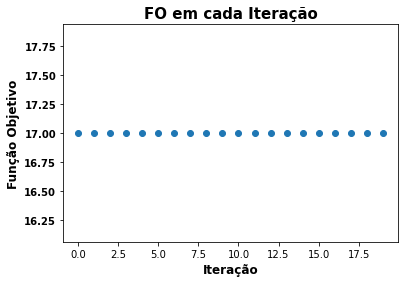

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def busca_local(s, b, p, n, pena):
  fo = calcula_fo(b, p, s, n, cap, pena)
  flag = 1
  while flag:
    flag = 0
    melhor, bi = melhor_vizinho(s, b, p, n, pena)
    if melhor > fo:
      s[bi] = 1 - s[bi]
      fo = melhor
      flag = 1
      #print(s)
      #print(fo)
  return s, fo

def melhor_vizinho(s, b, p, n, pena):
  melhor = -math.inf
  for i in range(n):
    s[i] = 1 - s[i] #Troca o bit
    f = calcula_fo(b, p, s, n, cap, pena)
    s[i] = 1 - s[i] #destroca
    if f > melhor:
      melhor = f
      bi = i
  return melhor, bi
   

def calcula_fo(b, p, s, n, cap, pena):
  fo = 0
  pt = 0
  for i in range(n):
    fo = fo + s[i]*b[i]
    pt = pt + s[i]*p[i]
  if pt > cap:
    #print('Solução inviável')
    fo = fo -pena*(pt - cap)
  return fo

def gera_sol(s, n, taxa):
  for i in range(n):
    x = np.random.random()
    if x < taxa:
      s[i] = 1
  return s

#DADOS DO PROBLEMA-------------------#
n = 8 #Quantidade de objetos
beneficio = [4, 3, 2, 6, 2, 3, 5, 4]
peso =      [5, 4, 3, 9, 4, 2, 6, 7]
cap = 20 #Capacidade da mochila
#------------------------------------#
#ESTATÍSTICAS------------------------#
fo_inicial = []
fo_final = []
xlabel = []
media = 0
#------------------------------------#
#PARÂMETROS--------------------------#
penalidade = 2 #Penalidade por solução inviável
taxa = 0.5     #Taxa para gerar sol. inicial, deve ser entre (0,1)
v = 3          #Número de vizinhanças
#------------------------------------#

experimentos = 20
for seed in range(experimentos):
  xlabel.append(seed)
  np.random.seed(seed)
  #Inicialização
  sol_star = n*[0]
  sol = n*[0] #Vetor para guardar a Solução
  sol = gera_sol(sol, n, taxa)
  fo = calcula_fo(beneficio, peso, sol, n, cap, penalidade)
  for i in range(n):
    sol_star[i] = sol[i]
  fo_star = fo
  k = 1
  #print('Início')
  while k <= v:
    #print('k = ', k)
    #Gera um vizinho aleatório
    for i in range(k):
      j =  np.random.randint(0, n)
      sol[j] = 1 - sol[j]
    #Aplica a busca local
    sol, fo = busca_local(sol, beneficio, peso, n, penalidade)
    #Verica se melhorou
    if fo > fo_star:
      #Retorna à primeira vizinhança
      k = 1
      fo_star = fo
      #print('fo = ', fo)
      for i in range(n):
        sol_star[i] = sol[i]
    else:
      #Como não melhorou avança para a próxima vizinhança
      k = k +1
      for i in range(n):
        #Garente que o movimento será realizado sobre a melhor solução
        sol[i] = sol_star[i]


  media = media + fo_star
  fo_final.append(fo_star)

media = media/experimentos
#print('Melhor solução = ', fo_star)
#print('Melhor iteração =', best_iter)
print('Média = ', media)
#plt.scatter(xlabel, fo_inicial)
plt.scatter(xlabel, fo_final)
plt.title("FO em cada Iteração", fontsize = 15, fontweight = 'bold')
plt.xlabel("Iteração", fontsize = 12, fontweight = 'bold')
plt.ylabel("Função Objetivo", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight='bold')
plt.show()